# Fundamentals of Data Analysis Project Notebook - Iris Dataset Analysis
Author - Sean Humphreys

---

### Contents

1. [Problem Statement](#problem-statement)
2. [Background](#background)
4. [Pandas](#pandas)
5. [Dataset Inspection](#dataset-inspection)
    1. [Data Quality](#data-quality)
    2. [Dataset Variables](#dataset-variables)
6. [Dataset Summary](#dataset-summary)
    1. [Nominal Variable](#nominal-variable---species)
    2. [Continuous Variables](#continuous-variables)
7. [Data Visualisation](#data-visualisation)
    1. [Categorical Variable](#categorical-variable)
    2. [Numerical Variables](#numerical-variables)
3. [Background Reading](#background-reading)

---

## Problem Statement <a id="problem-statement"></a>

- create a notebook investigating the variables and data points within the well-known iris flower data set associated with Ronald A Fisher.
- in the notebook, you should discuss the classification of each variable within the data set according to common variable types and scales of measurement in mathematics, statistics, and Python.
- Select, demonstrate, and explain the most appropriate summary statistics to describe each variable.
- Select, demonstrate, and explain the most appropriate plot(s) for each variable
- The notebook should follow a cohesive narrative about the data set.
---

## Background <a id="background"></a>

The [Iris Data Set (https://en.wikipedia.org/wiki/Iris_flower_data_set)](https://en.wikipedia.org/wiki/Iris_flower_data_set) is a data set that consists 50 samples from 
three species of Iris - Iris-setosa, Iris-virginica and Iris-versicolor. Each sample contains 4 measurements:
1. Petal width
2. Petal length
3. Sepal width
4. Sepal length

This data set is an example of a multivariate data set and was popularised by statistician and biologist [Sir Ronald
Fisher (https://en.wikipedia.org/wiki/Ronald_Fisher)](https://en.wikipedia.org/wiki/Ronald_Fisher) in his 1936 paper entitled 
[*"The use of multiple measurements in taxonomic problems"* (https://digital.library.adelaide.edu.au/dspace/bitstream/2440/15227/1/138.pdf)](https://digital.library.adelaide.edu.au/dspace/bitstream/2440/15227/1/138.pdf)
. The data was collected by [Dr. Edgar Anderson (https://en.wikipedia.org/wiki/Edgar_Anderson)](https://en.wikipedia.org/wiki/Edgar_Anderson) from the Gaspé Peninsula in Canada. Two of the three species were collected from the same meadow, by the same person, using standard equipment 
in order to minimise the risk of variation in the data samples arising from the way in which it was collected and 
measured. Dr. Anderson is recognised as a significant contributor in the field of botanical genetics.

As can be seen from the picture below the appearance of each species is similar. Sir Fisher's Analysis of the data set
enabled accurate classification of the species from petal and sepal measurement and as a result the data set is 
routinely used as a beginners dataset for machine learning purposes.

![image 1](images/illustrations/Iris_Image.png "Iris Species")

---

## Pandas <a id="pandas"></a>

Using *Python*, import the Iris dataset.

In [1]:
from ucimlrepo import fetch_ucirepo

# fetch dataset 
iris = fetch_ucirepo(id=53)

[Pandas (https://pandas.pydata.org/)](https://pandas.pydata.org/) is an open source software library used in data analytics that allows data analysis and manipulation. Pandas is built on top of the *Python* programming language. A Pandas DataFrame is a dictionary like container for Series objects. A DataFrame is the primary Pandas data structure. Using Pandas it is possible to define variables to put the Iris dataset into Pandas DataFrames.

In [2]:
# data (as pandas dataframes) 
iris_ds_features = iris.data.features 
iris_ds_targets = iris.data.targets

To confirm the DataFrame data structure, the built-in *type* function in Python is used. 

In [3]:
print(type(iris_ds_features))
print(type(iris_ds_targets))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


A benefit of using Pandas is that it can be used to make datasets readable. In this instance Pandas is used to combine the two datasets into one DataFrame and rename the columns. Further cleaning of the dataset is carried out to remove the "*Iris-*" string from the species entries so that just the subgenus is left as a string in the species column.

In [4]:
# add the 'class' variable from iris_ds_targets variable into the iris_ds_features Pandas DataFrame
iris_ds_features['class'] = iris_ds_targets['class']

# rename the existing DataFrame (rather than creating a copy) 
iris_ds_features.rename(columns={'sepal length': 'sepal_length_cm', 'sepal width': 'sepal_width_cm', 'petal length': 'petal_length_cm', 'petal width': 'petal_width_cm', 'class': 'species'},  inplace=True)

# remove "Iris-" string from species entries - https://www.statology.org/pandas-remove-characters-from-string/ [Accessed 13 Oct. 2023]
iris_ds_features['species'] = iris_ds_features['species'].str.replace('Iris-', '')

---

## Dataset Inspection <a id="dataset-inspection"></a>

### Data Quality <a id="data-quality"></a>

Using the `isnull()` chained with the `sum()` method the dataset can be inspected for missing values. The output indicates no missing values in the dataset.

In [5]:
# https://www.geeksforgeeks.org/python-basics-of-pandas-using-iris-dataset/ [Accessed 13 Oct. 2023].
iris_ds_features.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
species            0
dtype: int64

### Dataset Variables <a id="dataset-variables"></a>

Using the Pandas `head()` method the first 5 lines of the DataFrame can be viewed. From the output 5 variables are identified within the Iris Data

In [6]:
iris_ds_features.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Information on the data types in the Iris dataset is displayed with the following code (GitHub, 2023).

In [7]:
iris.variables

,name,role,type,demographic,description,units,missing_values
0,sepal length,Feature,Continuous,None,None,cm,no
1,sepal width,Feature,Continuous,None,None,cm,no
2,petal length,Feature,Continuous,None,None,cm,no
3,petal width,Feature,Continuous,None,None,cm,no
4,class,Target,Categorical,None,"class of iris plant: Iris Setosa, Iris Versico...",None,no


Information on the datatypes in the Iris dataset is summarised using the `info()` method (www.w3schools.com, n.d.).

In [8]:
iris_ds_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Variable classification determines the type of analysis that can be carried out on that variable. The graphic below summarises the types of data and how they can be analysed. 

![Data Summary](images/illustrations/data_categories_18102023_sh.png "Data Summary Graphic")

Summarised from Sharma, 2020

Levels of measurement tell how precisely variables are recorded (Bhandari, 2020) and are summarised as follows:

| Level             | Description                                                                   |
| :-----------      | :----------                                                                   |
| Nominal           | The data can only be categorized                                              |
| Ordinal           | The data can be categorized and ranked                                        |
| Interval          | The data can be categorized, ranked, and evenly spaced                        |
| Ratio             | The data can be categorized, ranked, evenly spaced, and has a natural zero    |

Applying data type classification and levels of measurement the Iris dataset variables can be summarised as follows:

| Variable          | Classification    | Type          | Python Dtype  | Unit of Measure   | Level of Measure  |
| :----------       | :----------       | :----------   | :----------   | :---------        | :---------        |
| sepal length      | Numerical         | Continuous    | float64       | cm                | Ratio             |
| sepal width       | Numerical         | Continuous    | float64       | cm                | Ratio             |
| petal length      | Numerical         | Continuous    | float64       | cm                | Ratio             |
| petal width       | Numerical         | Continuous    | float64       | cm                | Ratio             |
| species           | Categorical       | Nominal       | Object        | N/A               | Nominal           |

The above summaries of the Iris data set variables indicate the following:
1. Sepal length, sepal width, petal length and petal width are continuous data types with ratio level of measurement. As per Sharma (2020), the mathematical operations that can be performed on continuous data include addition, subtraction, multiplication and division on fractions and decimals. Thus, these 4 variables are suitable for complex statistical analysis.
2. Sepal length, sepal width, petal length and petal width and 64-bit are stored in memory as 64bit floating point numbers. 64-bit datatypes allow for a hgh degree of precision. However, use of 64-bit precision comes at a cost of computational overhead as more memory is required to complete calculations on these numbers due to their size.
3. The species variable is a categorical data type with a nominal level of measurement. The only analysis that can be carried out on it is counts of objects.
4. The species variable is stored in the Pandas DataFrame as an object. The Pandas object datatype is used to store text or mixed numeric and non-numeric values (Moffitt, 2018).

---

## Dataset Summary <a id="dataset-summary"></a>

### Nominal Variable <a id="nominal-variable"></a>

As *species* is a nominal variable, analysis of this variable is limited to counts of objects. The only measure of central tendency for this variable type is the mode (Corporate Finance Institute, n.d.). The mode is the value that appears most often in a set. Using the `value_counts()` method it is possible to count the number of unique occurrences on an object.

In [9]:
iris_ds_features['species'].value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

The *species* variable can be described as tri-modal as each of the species occurs 50 times.

In [10]:
iris_ds_features['species'].mode()

0        setosa
1    versicolor
2     virginica
Name: species, dtype: object

### Continuous Variables <a id="continuous-variables"></a>

Sepal length, sepal width, petal length and petal width are continuous variables. Complex mathematical operations can be carried out on these variables. The *Pandas* `describe()` returns a summary of the variables (MungingData, 2021):


In [11]:
iris_ds_features.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The **mean** value is expressed mathematically where the mean is the sum of the values divided by the number of values:

$\bar X= \frac{\Sigma X}{n}$

**std** is the standard deviation. Standard deviation is a measure of how dispersed the data is in relation to the mean (National Library of Medicine, 2012). It can be thought of as how spread around the mean the data is. A small standard deviation and the data is tightly clustered around the mean, while a large standard deviation data points are further from the mean. The standard deviation expressed mathematically is:

$s = \sqrt{\frac {\sum_{i=1}^N (x_i - \overline{x})^2}{N-1}}$

The *median* or middle is reported at the 50% value in the above python output. The 25% and 75% values are the $1^{st}$ and $3^{rd}$ quartile values. The $1^{st}$ & $3^{rd}$ quartiles can be used to identify outlier values in the dataset, this will be explored further in [Data Visualisation]().

The mode of the continuous variables can be reported:

In [12]:
iris_ds_features[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']].mode()


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.0,3.0,1.5,0.2


Of note, there is an issue caused by limitations in the way in which Python performs floating point arithmetic (docs.python.org, n.d.). Floating point numbers are stored in memory as base 2 binary fractions. Most decimal fractions cannot be represented exactly as binary fractions. Thus decimal floating-point numbers are only approximated by the binary floating-point numbers actually stored in the machine. This has the potential to cause inaccuracies when arithmetic is performed on floating point numbers in Python. In the Iris dataset *sepal length*, *sepal width*, *petal length* and *petal width* are stored in the Pandas DataFrame as 64bit floating point numbers. This allows for a high degree of precision and will somewhat mitigate the issue outlined above, albeit at the cost of a computational overhead due to the larger size of this datatype.

The importance of precision is demonstrated by comparing the table below to the output of the `describe()` method above.
![Iris dataset summary](images/tables/data_summary.png 'High Precision Summary')

The mean petal width measurement is being shown to precision of 6 decimal places in the python output. However, it appears that the last number is being rounded up to 7 when compared to the table above. Therefore, 1.198667 is an approximation of the mean petal width. Performing the same arithmetic on both numbers will give different results as they are different numbers. This may seem insignificant, however, could lead to inaccurate model development.

## Data Visualisation <a id="data-visualisation"></a>




[*Matplotlib* (https://matplotlib.org/stable/)](https://matplotlib.org/stable/) is an opensource software library for creating static, animated, and interactive visualizations. [*Seaborn* (https://seaborn.pydata.org/)](https://seaborn.pydata.org/) is based on matplotlib and provides more advanced data visualisation. These software libraries allow for data visualisation using python.

In [13]:
# import matplotlib
import matplotlib.pyplot as plt

# import seaborn as sns
import seaborn as sns

### Categorical Variable <a id="categorical-variable"></a>

The value counts of the *species* variable can be visualised as bar chart.

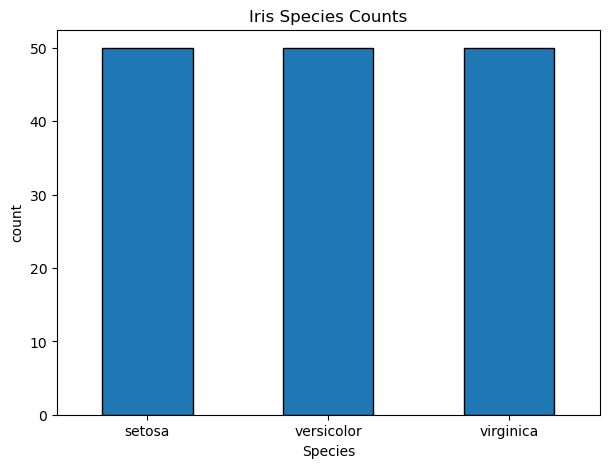

In [14]:
plt.rcParams['figure.figsize'] = (7,5)


iris_ds_features['species'].value_counts().plot(kind = 'bar', linewidth = 1, edgecolor = 'k')
plt.title('Iris Species Counts')
plt.xlabel('Species')
plt.ylabel('count')
plt.xticks(rotation = 360)
plt.show()

Visualising the data in this way gives no insight into the data. However, visualising the continuous variables by species is more informative. 

### Numerical Variables <a id="numerical-variables"></a>

Visualising the dataset by species allows deeper insight into the dataset.

Outliers, the median, mean and upper and lower quartiles can be viewed using boxplots. Outliers are described as objects that 
deviate significantly from the rest for the objects. Outliers can be caused by a number of things including measurement error, sampling problems and natural variation (Singh, 2020). The outliers are visible on **[Plot 1](images/plots/box_plots/box_plots.png)** as diamonds. The mean value ois demonstrated by the clear circle marker.

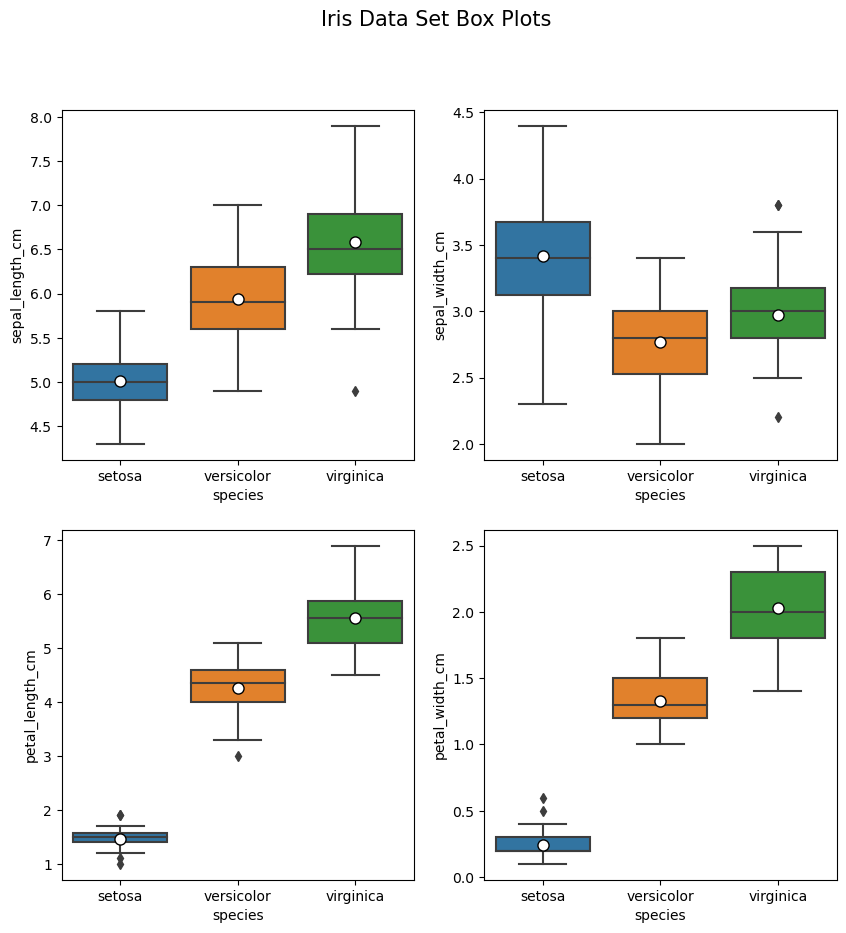

In [19]:
# function to pass arguments to sns.boxplot method
def graph(y):
    sns.boxplot(x="species", y=y, data=iris_ds_features, showmeans=True, meanprops={'marker':'o', 'markerfacecolor':'white',
                'markeredgecolor':'black', 'markersize':'8'})

# plot size
plt.figure(figsize=(10, 10))
plt.suptitle('Iris Data Set Box Plots', size=15)

# Adding the subplot at the specified grid position
plt.subplot(221)
graph('sepal_length_cm')

plt.subplot(222)
graph('sepal_width_cm')

plt.subplot(223)
graph('petal_length_cm')

plt.subplot(224)
graph('petal_width_cm')

## References <a id="references"></a>

Bhandari, P. (2020). Levels of Measurement | Nominal, Ordinal, Interval and Ratio. [online] Scribbr. Available at: https://www.scribbr.com/statistics/levels-of-measurement/. [Accessed 18 Oct. 2023].

Corporate Finance Institute. (n.d.). Nominal Data. [online] Available at: https://corporatefinanceinstitute.com/resources/data-science/nominal-data/. [Accessed 4 Nov. 2023].

docs.python.org. (n.d.). 15. Floating Point Arithmetic: Issues and Limitations — Python 3.10.1 documentation. [online] Available at: https://docs.python.org/3/tutorial/floatingpoint.html. [Accessed 18 Oct. 2023].

GitHub. (2023). ucimlrepo package. [online] Available at: https://github.com/uci-ml-repo/ucimlrepo [Accessed 20 Oct. 2023].

Moffitt, C. (2018). Overview of Pandas Data Types - Practical Business Python. [online] pbpython.com. Available at: https://pbpython.com/pandas_dtypes.html. [Accessed 6 Nov. 2023].

National Library of Medicine (2012). Finding and using health statistics. [online] www.nlm.nih.gov. Available at: https://www.nlm.nih.gov/oet/ed/stats/02-900.html. [Accessed 4 Nov. 2023].

Sharma, R. (2020). 4 Types of Data: Nominal, Ordinal, Discrete, Continuous. [online] upGrad blog. Available at: https://www.upgrad.com/blog/types-of-data/. [Accessed 18 Oct. 2023].

Singh, R. (2020). It’s all about Outliers. [online] Medium. Available at: https://medium.com/analytics-vidhya/its-all-about-outliers-cbe172aa1309. [Accessed 6 Nov. 2023].

www.w3schools.com. (n.d.). Pandas DataFrame info() Method. [online] Available at: https://www.w3schools.com/python/pandas/ref_df_info.asp. [Accessed 20 Oct. 2023].

---

## Associated Reading <a id="background-reading"></a>

archive.ics.uci.edu. (n.d.). UCI Machine Learning Repository. [online] Available at: https://archive.ics.uci.edu/dataset/53/iris. [Accessed 12 Oct. 2023].

Ekiz, A. (2023). Creating Table of Contents in Jupyter Notebook. [online] Medium. Available at: https://medium.com/@ahmetekiz/creating-table-of-contents-in-jupyter-notebook-52a7c696817f [Accessed 11 Oct. 2023].

GeeksforGeeks. (2020). Python - Basics of Pandas using Iris Dataset. [online] Available at: https://www.geeksforgeeks.org/python-basics-of-pandas-using-iris-dataset/. [Accessed 13 Oct. 2023].

https://digital.library.adelaide.edu.au/dspace/bitstream/2440/15227/1/138.pdf  [accessed 11 Oct. 2023].

kaggle.com. (n.d.). How to Classify Penguins - A Beginner’s Guide. [online] Available at: https://www.kaggle.com/code/mohamedharris/how-to-classify-penguins-a-beginner-s-guide [Accessed 6 Nov. 2023].

matplotlib.org. (n.d.). Matplotlib documentation — Matplotlib 3.5.0 documentation. [online] Available at: https://matplotlib.org/stable/. [Accessed 6 Nov. 2023].

Pandas (2018). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Pydata.org. Available at: https://pandas.pydata.org/. [Accessed 13 Oct. 2023].

pandas.pydata.org. (n.d.). pandas.DataFrame.value_counts — pandas 1.4.1 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html. [Accessed 04 Nov. 2023].

seaborn (2012). seaborn: statistical data visualization — seaborn 0.9.0 documentation. [online] Pydata.org. Available at: https://seaborn.pydata.org/. [Accessed 6 Nov. 2023].

Scribbr. (n.d.). Can there be more than one mode? [online] Available at: https://www.scribbr.com/frequently-asked-questions/can-there-be-more-than-one-mode/. [Accessed 04 Nov. 2023]

sphweb.bumc.bu.edu. (n.d.). Descriptive Statistics for Continuous Variables. [online] Available at: https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_summarizingdata/BS704_SummarizingData5.html.

Stack Overflow. (n.d.). python - Renaming column names in Pandas. [online] Available at: https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas. [Accessed 13 Oct. 2023]. [Accessed 04 Nov. 2023].

Wikipedia. (2023). Edgar Anderson. [online] Available at: https://en.wikipedia.org/wiki/Edgar_Anderson [Accessed 11 Oct. 2023].

Wikipedia Contributors (2019). Iris flower data set. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Iris_flower_data_set. [Accessed 11 Oct. 2023].
‌
Wikipedia Contributors (2019). Ronald Fisher. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Ronald_Fisher. [Accessed 11 Oct. 2023].

www.overleaf.com. (n.d.). List of Greek letters and math symbols. [online] Available at: https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols. [Accessed 4 Nov. 2023].

Zach (2022). Pandas: How to Remove Specific Characters from Strings. [online] Statology. Available at: https://www.statology.org/pandas-remove-characters-from-string/. [Acessed 13 Oct. 2023].

---

End of notebook